In [2]:
import os
import itertools
from keras.callbacks import EarlyStopping
from keras import backend as K
from sklearn.metrics import f1_score
import tools_stable as tools
import plot_confusion_matrix_Copy1 as plot_confusion_matrix
from sklearn.metrics import confusion_matrix

training_data, training_label, validation_data, validation_label, validation_cate_label = tools.get_data()

ks = 5
num_layer = 10
bs = 30
lr = 0.0001

Train Data: (10151, 9000, 1)
Train Label:  (10151, 4)
KFold(n_splits=5, random_state=100, shuffle=True)
trian: [    0     1     2 ... 10148 10149 10150] len 8120 test: [   12    21    22 ... 10136 10137 10138] len 2031
trian: [    2     4     5 ... 10148 10149 10150] len 8121 test: [    0     1     3 ... 10143 10144 10147] len 2030
trian: [    0     1     2 ... 10148 10149 10150] len 8121 test: [    4     5     8 ... 10130 10133 10146] len 2030
trian: [    0     1     2 ... 10146 10147 10149] len 8121 test: [   17    23    26 ... 10135 10148 10150] len 2030
trian: [    0     1     3 ... 10147 10148 10150] len 8121 test: [    2     6     7 ... 10142 10145 10149] len 2030


confusion matrix(hidden)

In [2]:
import numpy as np
import plot_confusion_matrix_Copy1 as plot_confusion_matrix
cnf_matrix = np.array([[142, 3, 3, 21],[8, 1127, 15, 65], [6, 7, 35, 5], [27, 119, 14, 434]])
plot_confusion_matrix.plot_confusion_matrix(cnf_matrix, classes=['AF','Normal','Noisy','Other'], save_png=True)

In [3]:
def run(bs, lr, ks, num_layer):
    fold=1
    for index, (X_train, Y_train, X_val, Y_val, val_cat) in enumerate(zip(training_data,
                                                       training_label,
                                                       validation_data,
                                                       validation_label,
                                                       validation_cate_label)):
        if index != 0: continue
        model = tools.create_model(lr, bs, ks, num_layer)
        print("Fold "+str(fold))
        early_stop = EarlyStopping(patience=20)
        history = model.fit(x = X_train, 
                            y = Y_train,
                            epochs=100,
                            validation_data=(X_val, Y_val),
                            callbacks=[early_stop],
                            batch_size=bs, 
                            verbose=1)
        model.save('K-1_model.h5')
#         model = load_model('K-1_model.h5')
        evaluation = model.evaluate(x = X_val, y = Y_val)
        validation_prediction = model.predict_classes(X_val, batch_size=bs)
        score = f1_score(val_cat, validation_prediction, average=None)
        print(score)
        
        fold = fold + 1
        
        test_prediction = model.predict_classes(X_val, batch_size=1)
        cnf_matrix = confusion_matrix(val_cat, test_prediction)
        plot_confusion_matrix.plot_confusion_matrix(cnf_matrix, classes=['AF','Noise','Normal','Other'], save_png=True)
        
        return X_val, val_cat, validation_prediction
    
f1_X_val, f1_val_cat, f1_validation_prediction = run(bs, lr, ks, num_layer)

Fold 1
Train on 8120 samples, validate on 2031 samples
Epoch 1/100
8120/8120 [==============================] - 13s 2ms/step - loss: 1.0014 - acc: 0.5756 - val_loss: 0.9492 - val_acc: 0.5707
Epoch 2/100
8120/8120 [==============================] - 8s 950us/step - loss: 0.9077 - acc: 0.6106 - val_loss: 0.9003 - val_acc: 0.6056
Epoch 3/100
8120/8120 [==============================] - 8s 963us/step - loss: 0.8609 - acc: 0.6384 - val_loss: 0.8491 - val_acc: 0.6332
Epoch 4/100
8120/8120 [==============================] - 8s 967us/step - loss: 0.8002 - acc: 0.6722 - val_loss: 0.8087 - val_acc: 0.6460
Epoch 5/100
8120/8120 [==============================] - 8s 980us/step - loss: 0.7450 - acc: 0.6958 - val_loss: 0.7517 - val_acc: 0.6691
Epoch 6/100
8120/8120 [==============================] - 8s 976us/step - loss: 0.6896 - acc: 0.7180 - val_loss: 0.6817 - val_acc: 0.7218
Epoch 7/100
8120/8120 [==============================] - 8s 975us/step - loss: 0.6399 - acc: 0.7429 - val_loss: 0.6494 - val

In [18]:
import pylab as plt
def show(rec, gt, pred):
    plt.figure(figsize=(16,5))
    plt.xlim((0,3000))
    plt.plot(rec)
    print("GT:{}".format(gt))
    print("Pred: {}".format(pred))
    plt.show()

{'A':0, '~':1, 'N':2, 'O':3}

GT:0
Pred: 3


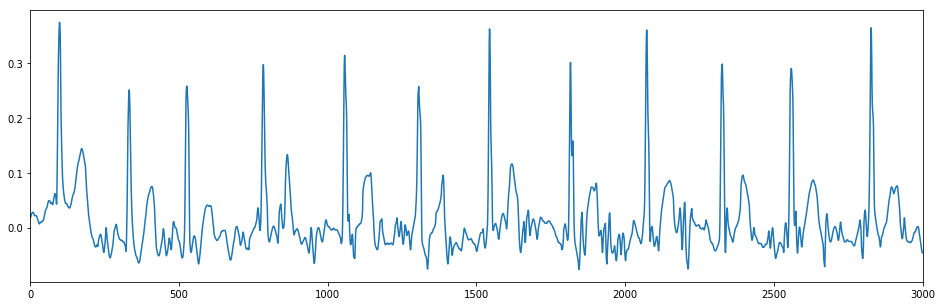

GT:0
Pred: 3


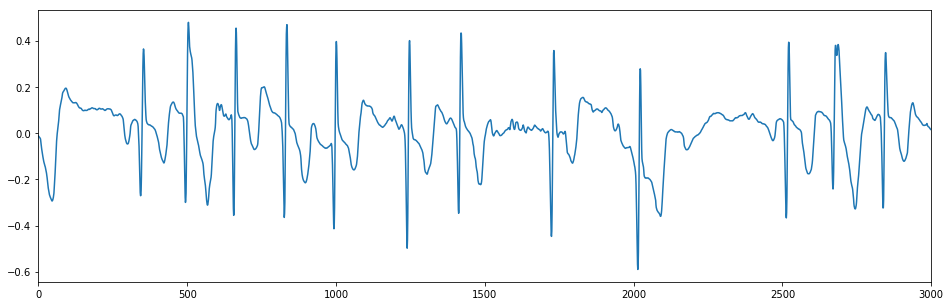

GT:0
Pred: 3


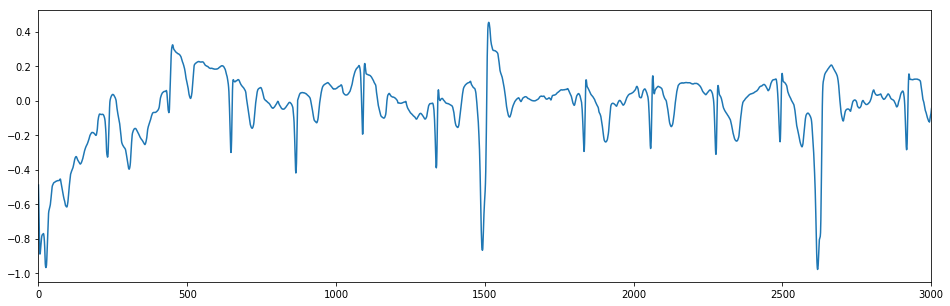

GT:0
Pred: 3


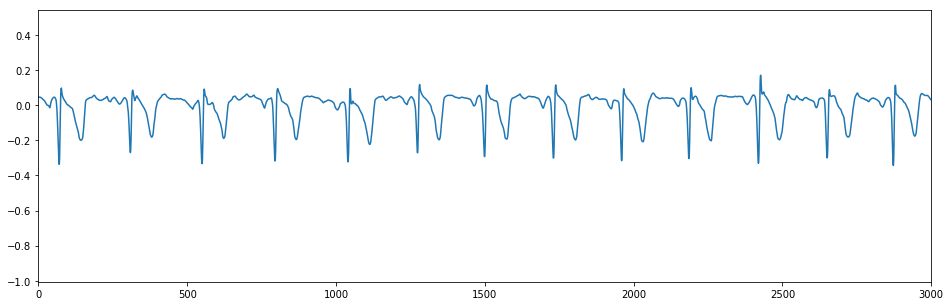

GT:0
Pred: 3


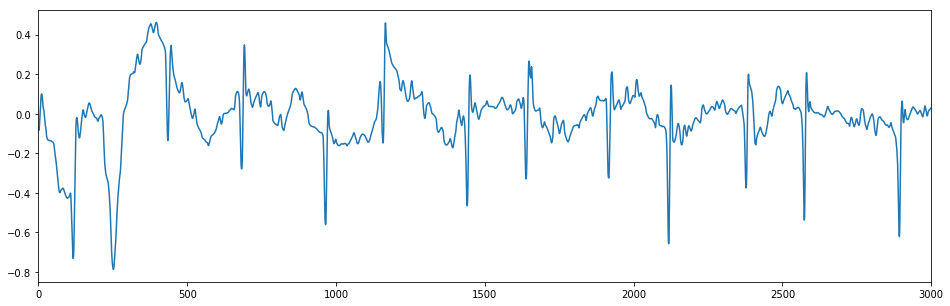

GT:0
Pred: 3


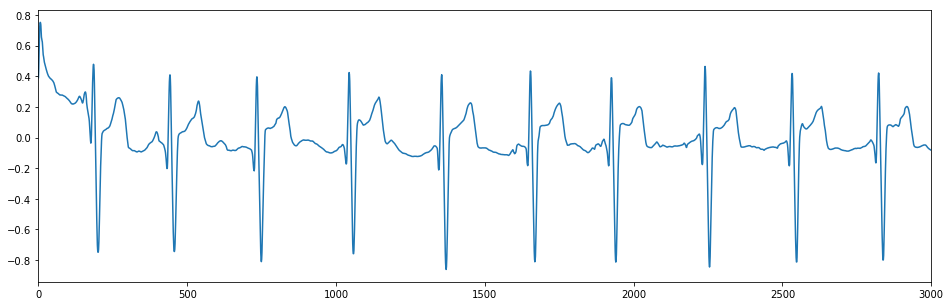

GT:0
Pred: 3


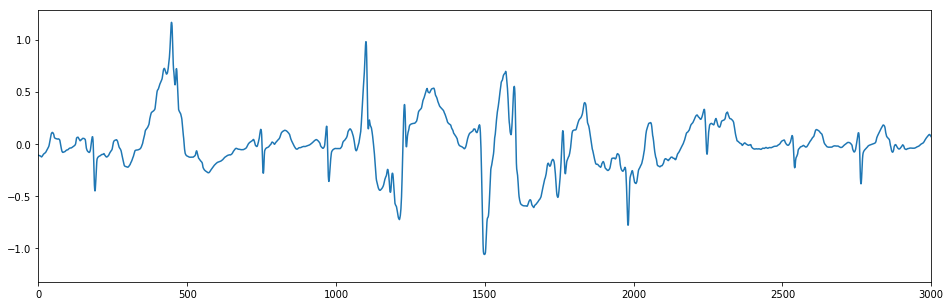

GT:0
Pred: 3


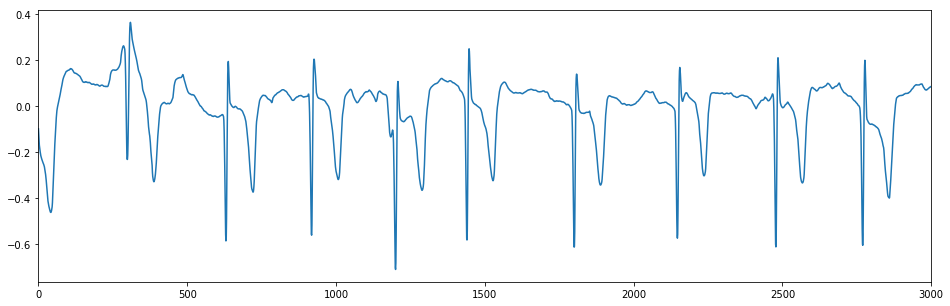

GT:0
Pred: 3


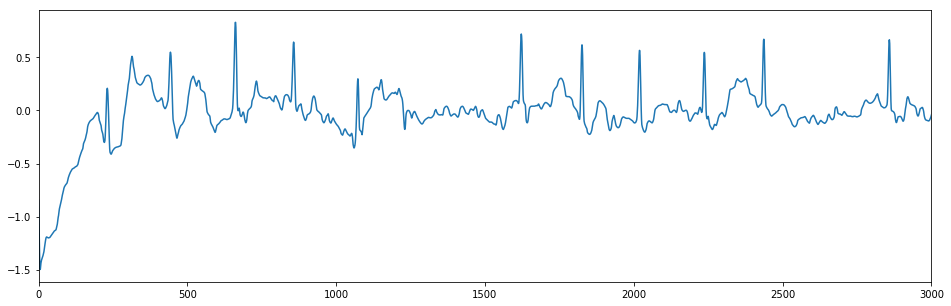

GT:0
Pred: 3


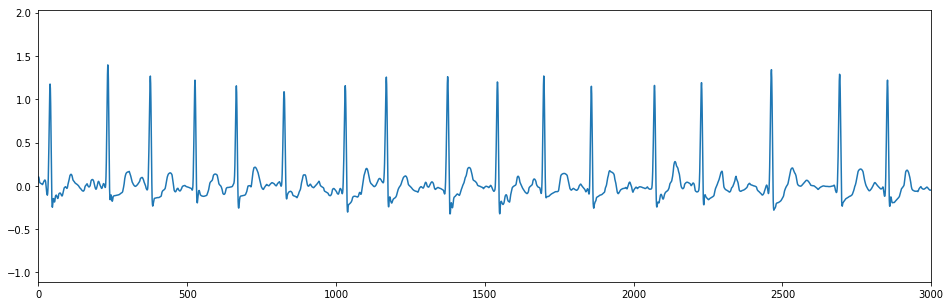

GT:0
Pred: 3


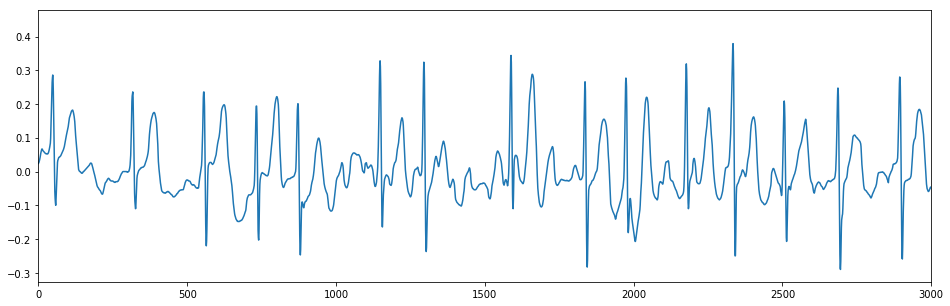

GT:0
Pred: 3


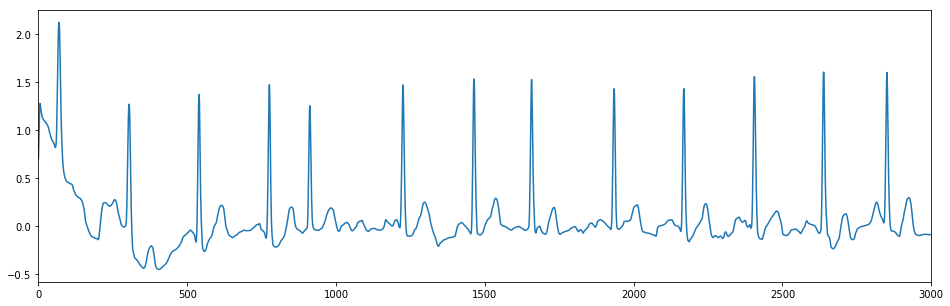

GT:0
Pred: 3


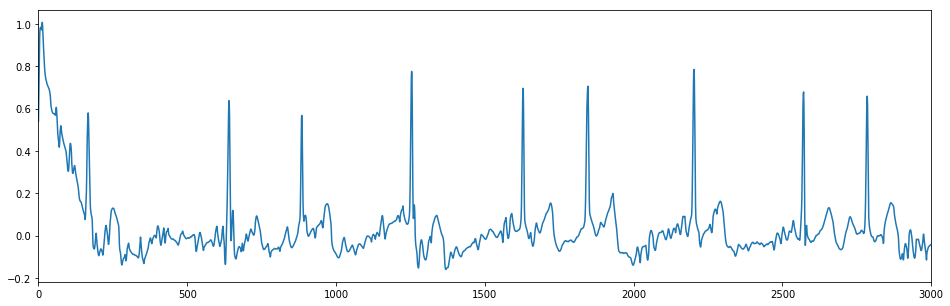

GT:0
Pred: 3


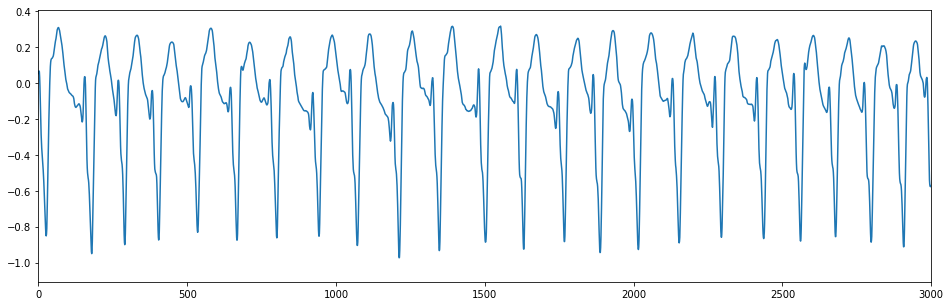

GT:0
Pred: 3


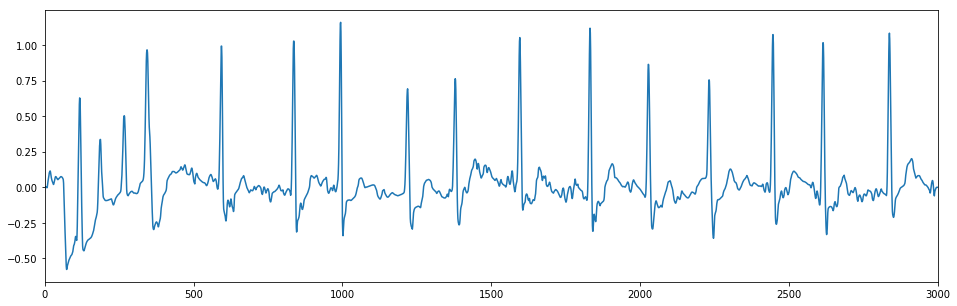

GT:0
Pred: 3


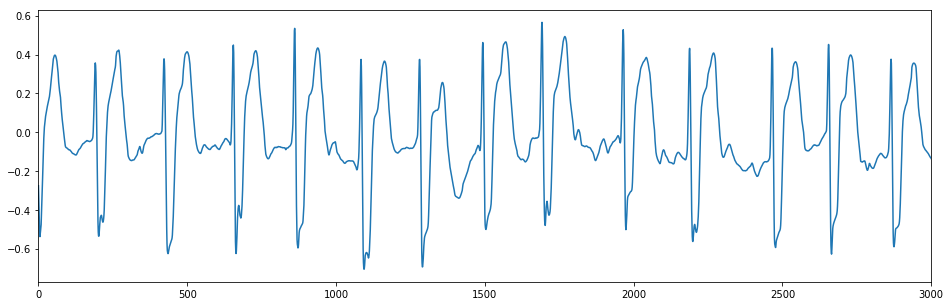

GT:0
Pred: 3


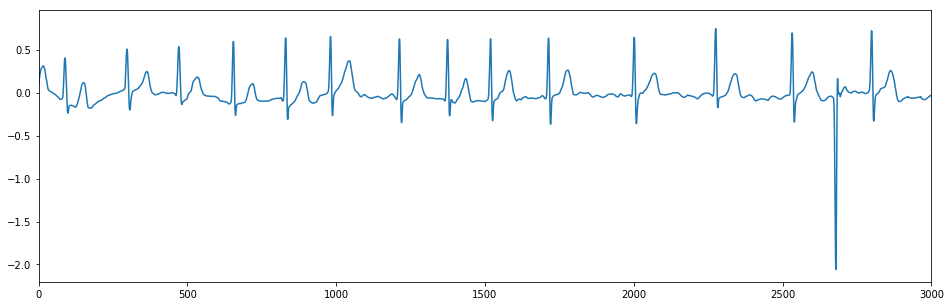

GT:0
Pred: 3


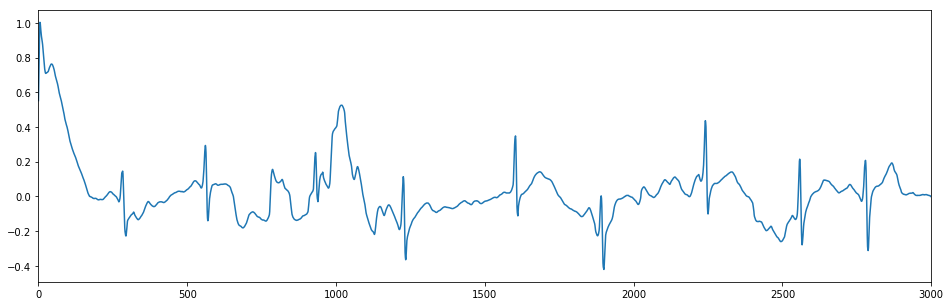

GT:0
Pred: 3


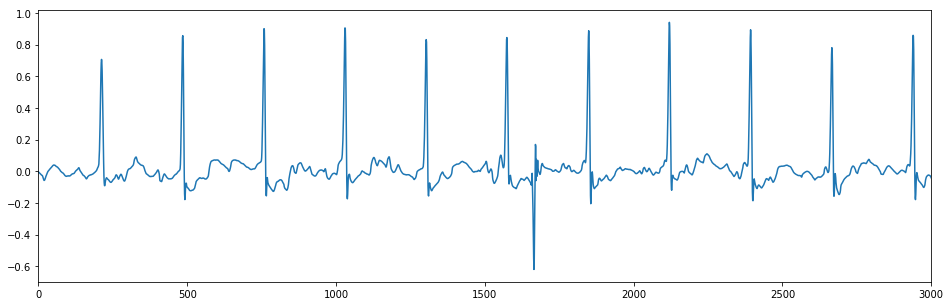

GT:0
Pred: 3


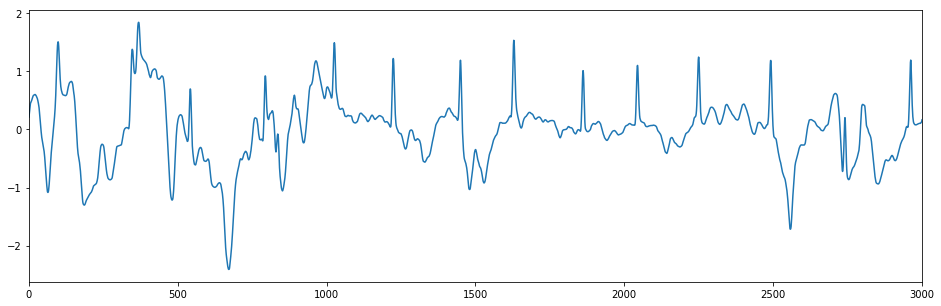

GT:0
Pred: 3


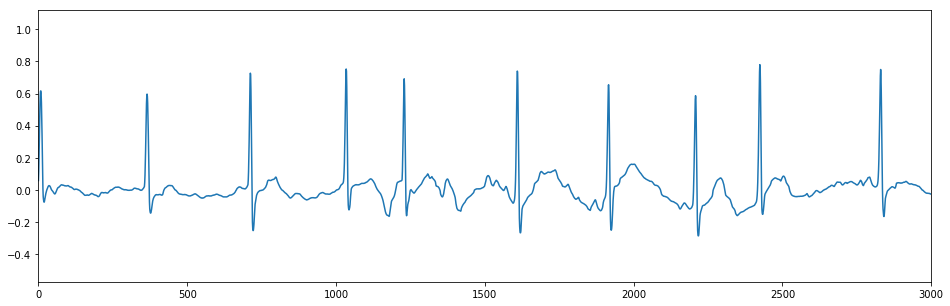

GT:0
Pred: 3


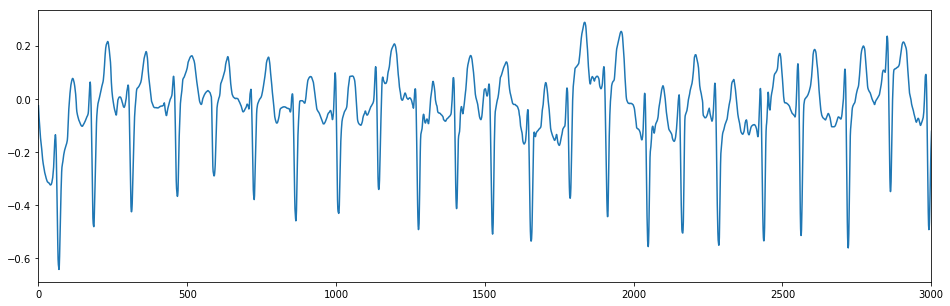

GT:0
Pred: 3


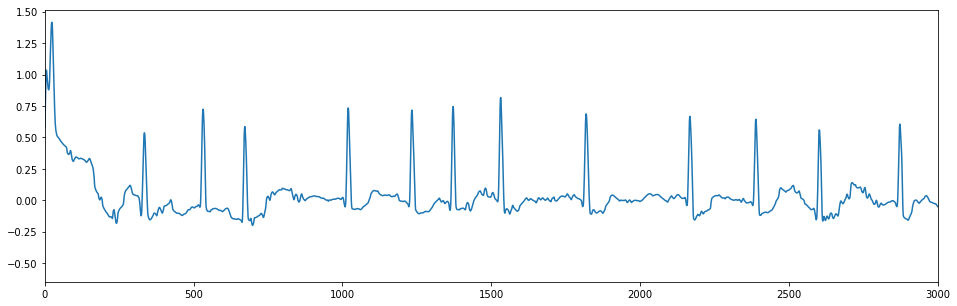

GT:0
Pred: 3


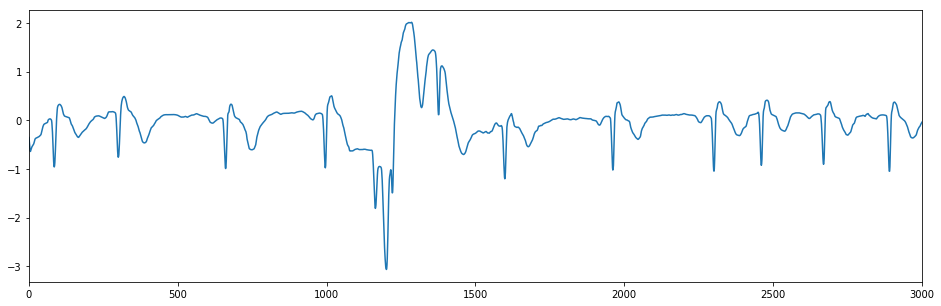

GT:0
Pred: 3


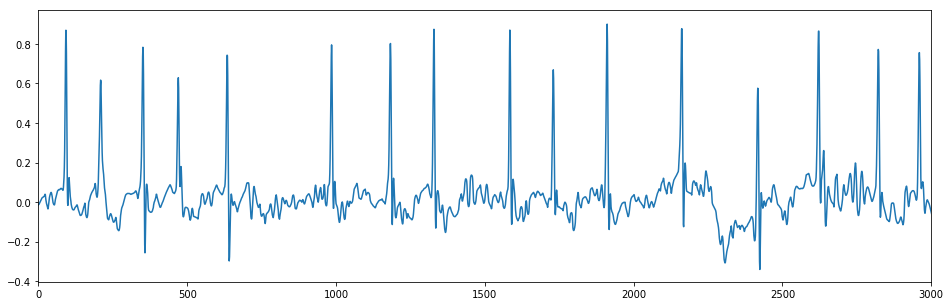

GT:0
Pred: 3


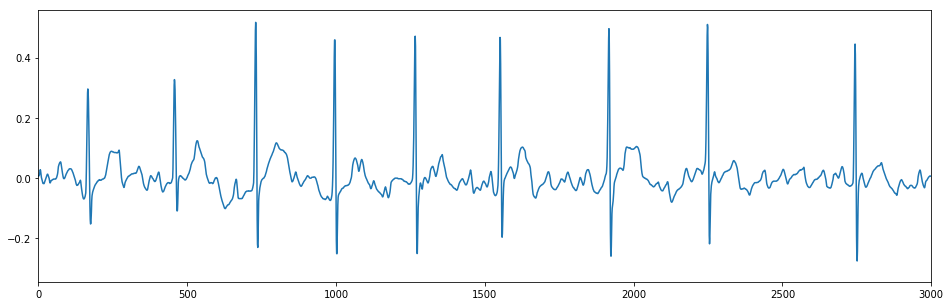

GT:0
Pred: 3


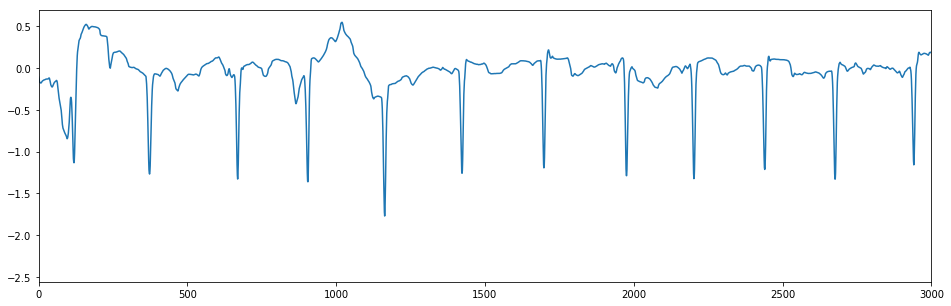

GT:0
Pred: 3


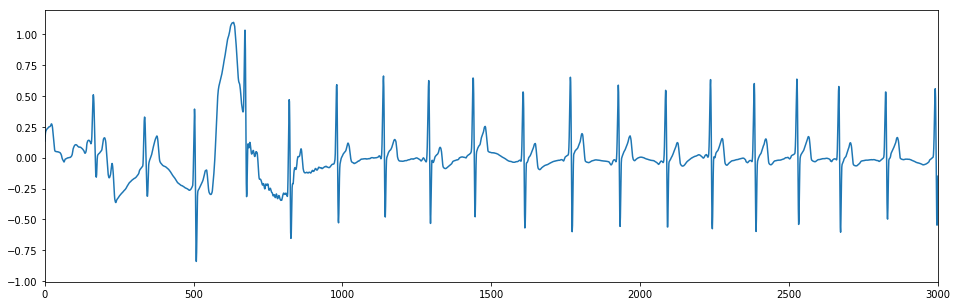

GT:0
Pred: 3


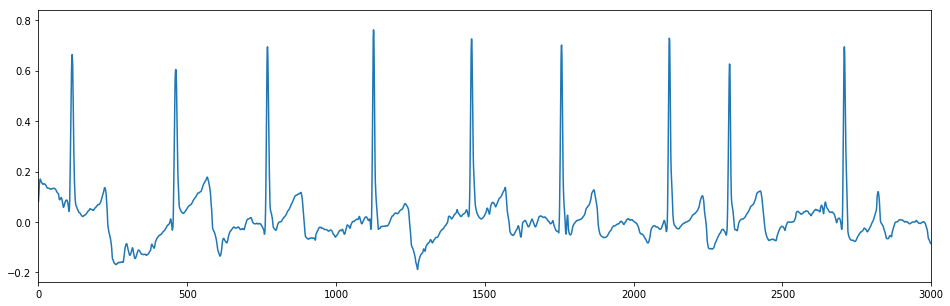

GT:0
Pred: 3


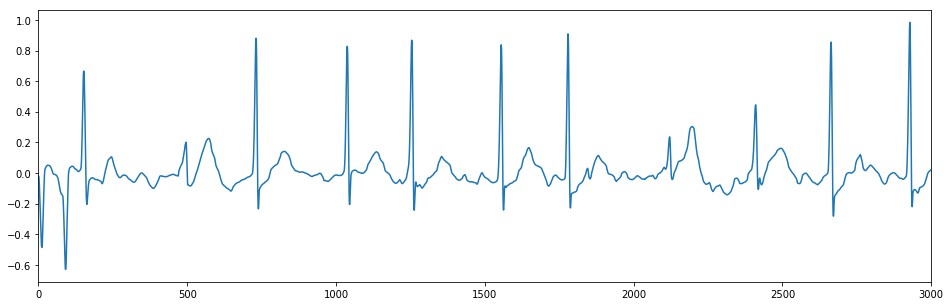

GT:0
Pred: 3


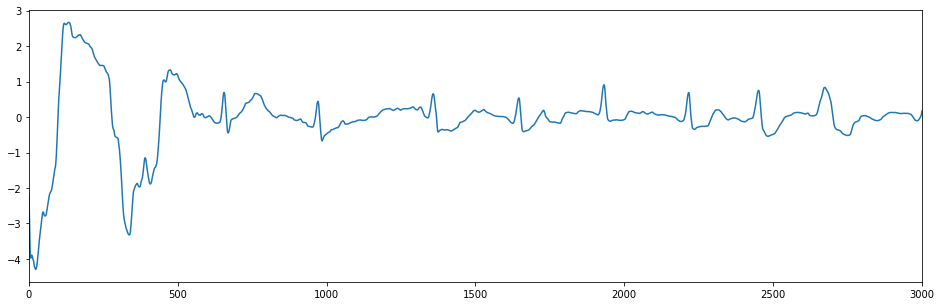

GT:0
Pred: 3


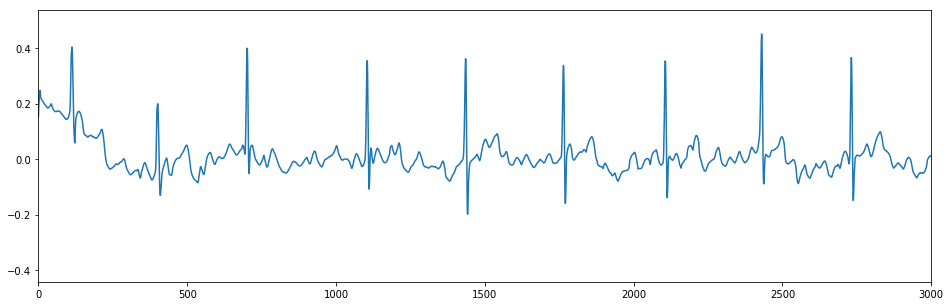

GT:0
Pred: 3


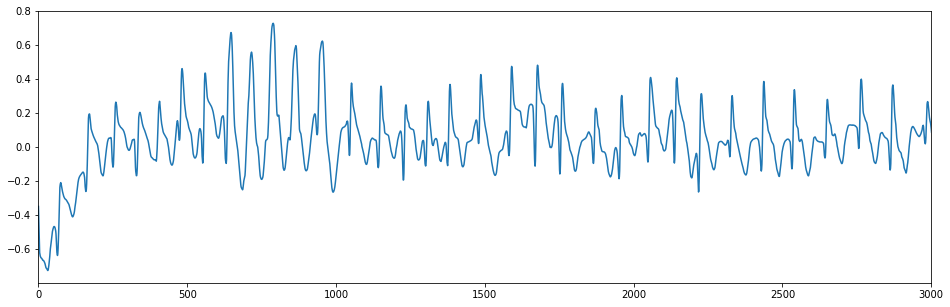

GT:0
Pred: 3


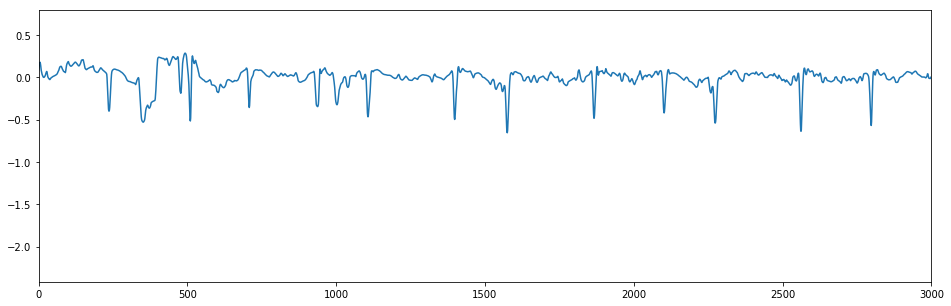

GT:0
Pred: 3


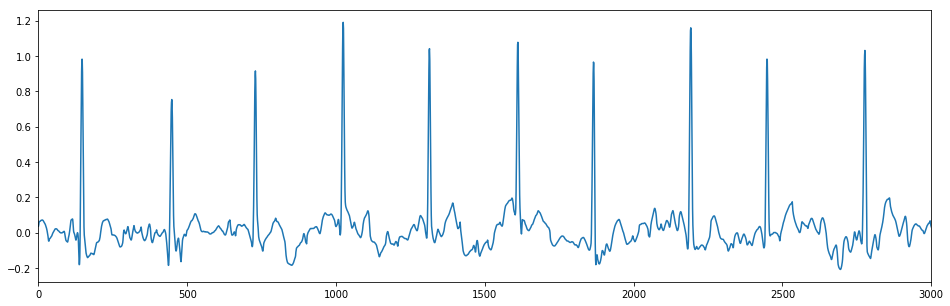

GT:0
Pred: 3


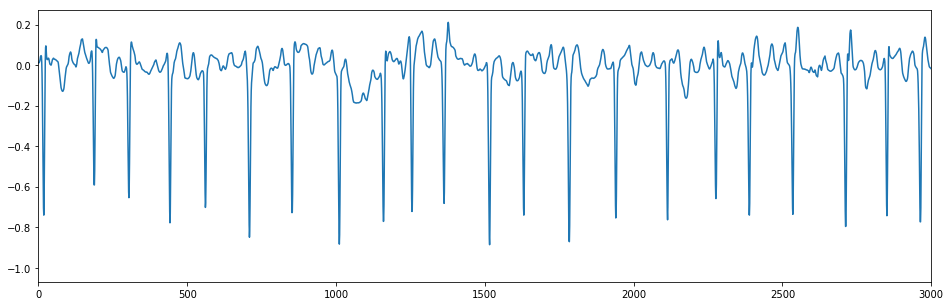

GT:0
Pred: 3


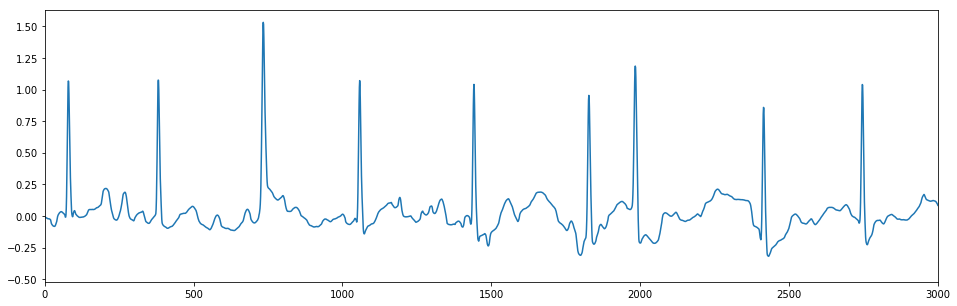

GT:0
Pred: 3


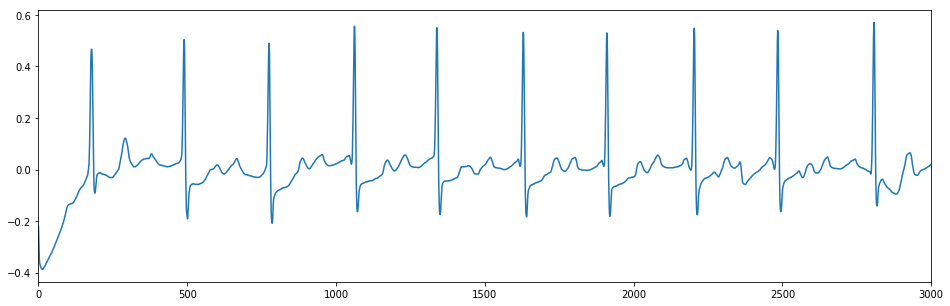

GT:0
Pred: 3


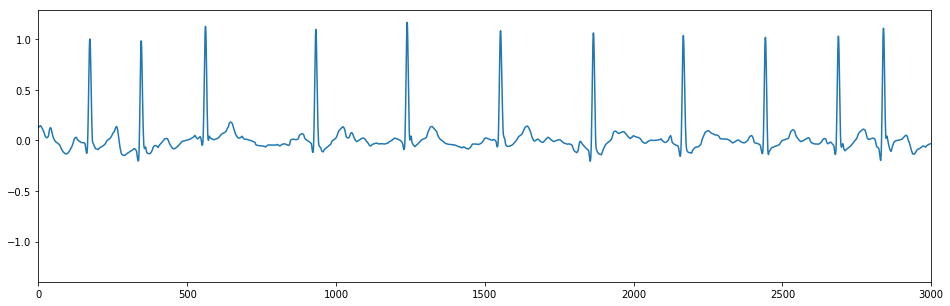

GT:0
Pred: 3


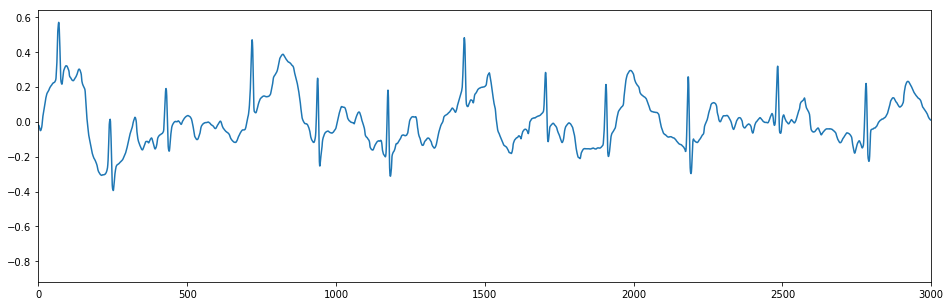

GT:0
Pred: 3


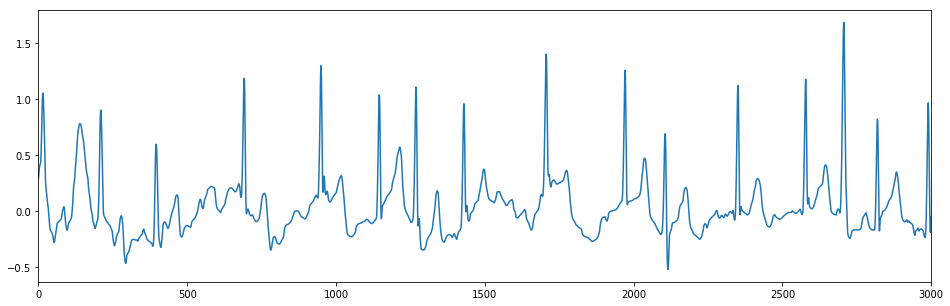

GT:0
Pred: 3


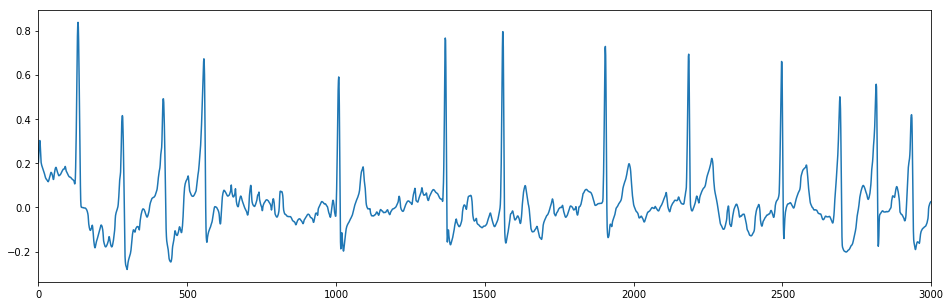

GT:0
Pred: 3


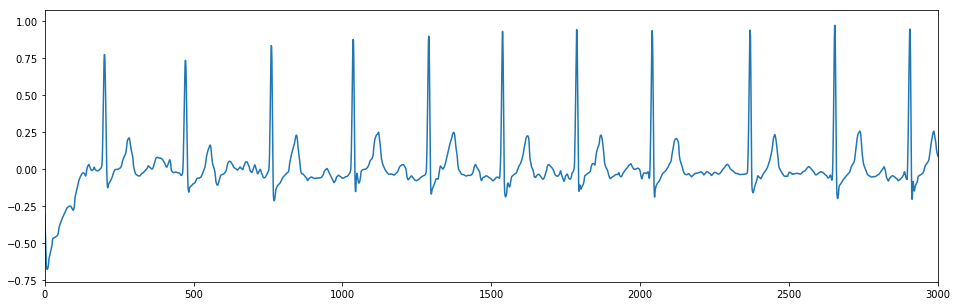

GT:0
Pred: 3


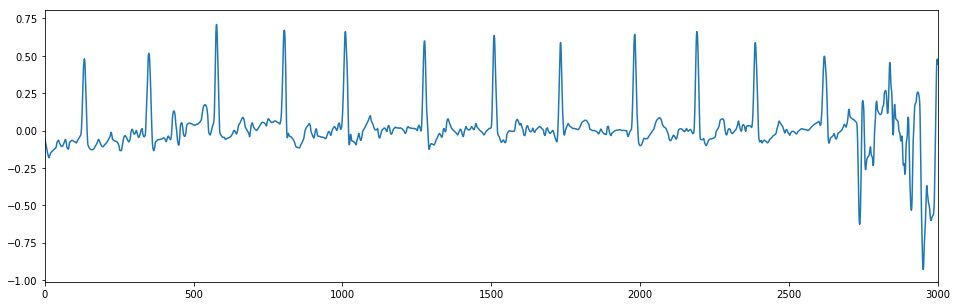

GT:0
Pred: 3


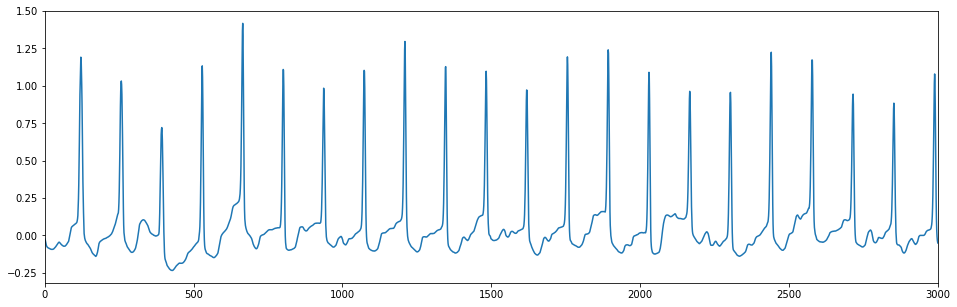

GT:0
Pred: 3


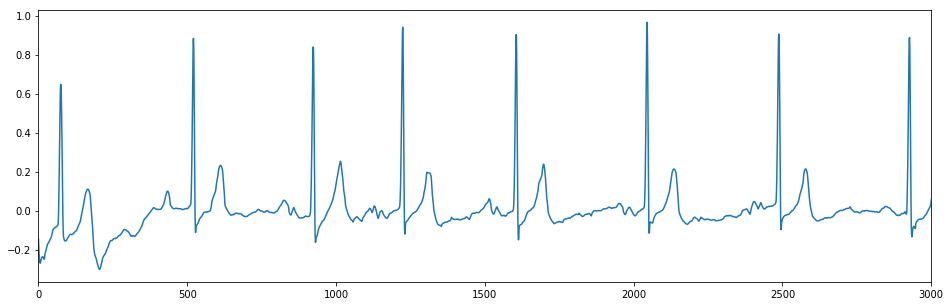

In [38]:
for i in AF_O:
    show(f1_X_val[i][:5000], f1_val_cat[i], f1_validation_prediction[i])

GT:0
Pred: 3


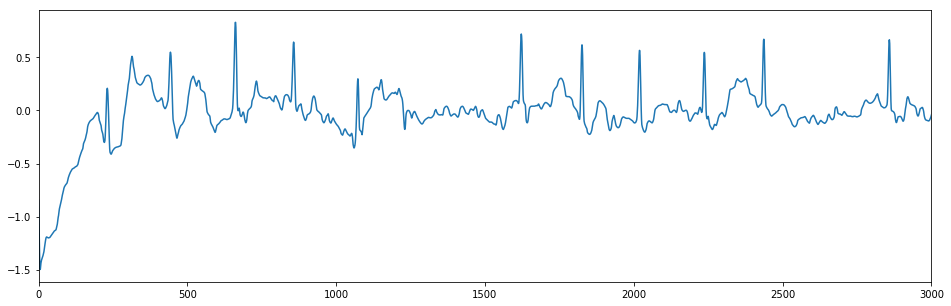

In [28]:
i = 41
show(f1_X_val[i][:5000], f1_val_cat[i], f1_validation_prediction[i])

GT:0
Pred: 0


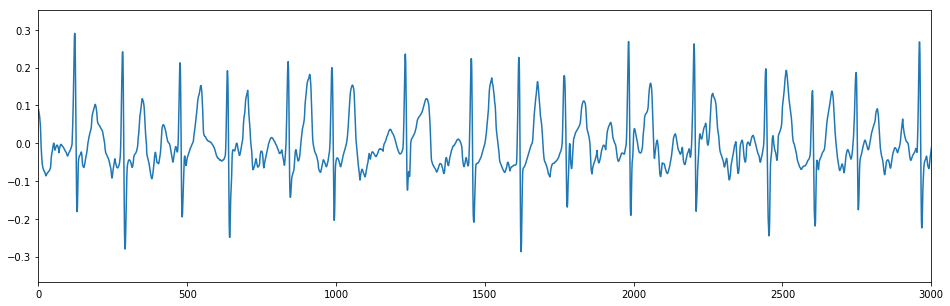

In [36]:
i = 11
show(f1_X_val[i], f1_val_cat[i], f1_validation_prediction[i])

In [37]:
AF_O = []
for t in range(len(f1_val_cat)):
    if f1_val_cat[t] == 0 and f1_validation_prediction[t] == 3:
        AF_O.append(t)
        print(t)
        print("gt: {}".format(f1_val_cat[t]))
        print("pred: {}".format(f1_validation_prediction[t]))

3
gt: 0
pred: 3
6
gt: 0
pred: 3
7
gt: 0
pred: 3
8
gt: 0
pred: 3
14
gt: 0
pred: 3
16
gt: 0
pred: 3
36
gt: 0
pred: 3
40
gt: 0
pred: 3
41
gt: 0
pred: 3
42
gt: 0
pred: 3
44
gt: 0
pred: 3
50
gt: 0
pred: 3
55
gt: 0
pred: 3
59
gt: 0
pred: 3
60
gt: 0
pred: 3
63
gt: 0
pred: 3
65
gt: 0
pred: 3
66
gt: 0
pred: 3
70
gt: 0
pred: 3
77
gt: 0
pred: 3
88
gt: 0
pred: 3
89
gt: 0
pred: 3
96
gt: 0
pred: 3
1004
gt: 0
pred: 3
1008
gt: 0
pred: 3
1011
gt: 0
pred: 3
1015
gt: 0
pred: 3
1020
gt: 0
pred: 3
1022
gt: 0
pred: 3
1026
gt: 0
pred: 3
1028
gt: 0
pred: 3
1030
gt: 0
pred: 3
1033
gt: 0
pred: 3
1034
gt: 0
pred: 3
1040
gt: 0
pred: 3
1042
gt: 0
pred: 3
1043
gt: 0
pred: 3
1428
gt: 0
pred: 3
1430
gt: 0
pred: 3
1431
gt: 0
pred: 3
1444
gt: 0
pred: 3
1449
gt: 0
pred: 3
1453
gt: 0
pred: 3
1467
gt: 0
pred: 3
1482
gt: 0
pred: 3
1483
gt: 0
pred: 3


In [1]:
A_A = []
for t in range(len(f1_val_cat)):
    if f1_val_cat[t] == 0 and f1_validation_prediction[t] == 0:
        A_A.append(t)
        print(t)
        print("gt: {}".format(f1_val_cat[t]))
        print("pred: {}".format(f1_validation_prediction[t]))

NameError: name 'f1_val_cat' is not defined

In [78]:
from sklearn.utils import class_weight
import numpy as np
def run(bs, lr, ks, num_layer):
    fold=1
    for index, (X_train, Y_train, X_val, Y_val, val_cat) in enumerate(zip(training_data,
                                                       training_label,
                                                       validation_data,
                                                       validation_label,
                                                       validation_cate_label)):
        if index != 0: continue
        train_cat = [np.where(r==1) for r in Y_train]
        cat = [r[0].tolist()[0] for r in train_cat]
        class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(cat),
                                                 cat)
        model = tools.create_model(lr, bs, ks, num_layer)
        print("Fold "+str(fold))
        early_stop = EarlyStopping(patience=20)
        history = model.fit(x = X_train, 
                            y = Y_train,
                            epochs=100,
                            validation_data=(X_val, Y_val),
                            callbacks=[early_stop],
                            batch_size=bs,
                            class_weight=class_weights,
                            verbose=1)
        evaluation = model.evaluate(x = X_val, y = Y_val)
        validation_prediction = model.predict_classes(X_val, batch_size=bs)
        score = f1_score(val_cat, validation_prediction, average=None)
        print(score)
        
#         tools.show_plot(inner_path, history)
        fold = fold + 1
        
        test_prediction = model.predict_classes(X_val, batch_size=1)
        cnf_matrix = confusion_matrix(val_cat, test_prediction)
        plot_confusion_matrix.plot_confusion_matrix(cnf_matrix, classes=['AF','Noise','Normal','Other'], save_png=True)
        
        return X_val, val_cat, validation_prediction
    
f11_X_val, f11_val_cat, f11_validation_prediction = run(bs, lr, ks, num_layer)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

Fold 1
Train on 8120 samples, validate on 2031 samples
Epoch 1/100
8120/8120 [==============================] - 13s 2ms/step - loss: 1.0232 - acc: 0.5762 - val_loss: 0.9721 - val_acc: 0.5982
Epoch 2/100
8120/8120 [==============================] - 9s 1ms/step - loss: 0.9253 - acc: 0.6006 - val_loss: 0.8476 - val_acc: 0.6420
Epoch 3/100
8120/8120 [==============================] - 9s 1ms/step - loss: 0.8556 - acc: 0.6353 - val_loss: 0.8118 - val_acc: 0.6603
Epoch 4/100
8120/8120 [==============================] - 9s 1ms/step - loss: 0.7979 - acc: 0.6583 - val_loss: 0.7275 - val_acc: 0.6864
Epoch 5/100
8120/8120 [==============================] - 9s 1ms/step - loss: 0.7442 - acc: 0.6858 - val_loss: 0.6654 - val_acc: 0.7139
Epoch 6/100
8120/8120 [==============================] - 9s 1ms/step - loss: 0.7115 - acc: 0.6963 - val_loss: 0.6361 - val_acc: 0.7292
Epoch 7/100
8120/8120 [==============================] - 9s 1ms/step - loss: 0.6723 - acc: 0.7182 - val_loss: 0.5782 - val_acc: 0.7637

2 fold

In [3]:
def run(bs, lr, ks, num_layer):
    
    for index, (X_train, Y_train, X_val, Y_val, val_cat) in enumerate(zip(training_data,
                                                       training_label,
                                                       validation_data,
                                                       validation_label,
                                                       validation_cate_label)):
        if index != 1: continue
        model = tools.create_model(lr, bs, ks, num_layer)
        print("Fold "+str(index))
        early_stop = EarlyStopping(patience=20)
        history = model.fit(x = X_train, 
                            y = Y_train,
                            epochs=100,
                            validation_data=(X_val, Y_val),
                            callbacks=[early_stop],
                            batch_size=bs, 
                            verbose=1)
        evaluation = model.evaluate(x = X_val, y = Y_val)
        validation_prediction = model.predict_classes(X_val, batch_size=bs)
        score = f1_score(val_cat, validation_prediction, average=None)
        print(score)
        
#         tools.show_plot(inner_path, history)
        
        test_prediction = model.predict_classes(X_val, batch_size=1)
        cnf_matrix = confusion_matrix(val_cat, test_prediction)
        plot_confusion_matrix.plot_confusion_matrix(cnf_matrix, classes=['AF','Noise','Normal','Other'], save_png=True)
        
        return X_val, val_cat, validation_prediction
    
f2_X_val, f2_val_cat, f2_validation_prediction = run(bs, lr, ks, num_layer)

Fold 1
Train on 8121 samples, validate on 2030 samples
Epoch 1/100
8121/8121 [==============================] - 11s 1ms/step - loss: 1.0392 - acc: 0.5741 - val_loss: 1.0143 - val_acc: 0.5906
Epoch 2/100
8121/8121 [==============================] - 9s 1ms/step - loss: 0.9182 - acc: 0.5946 - val_loss: 0.8513 - val_acc: 0.6374
Epoch 3/100
8121/8121 [==============================] - 9s 1ms/step - loss: 0.8639 - acc: 0.6305 - val_loss: 0.8429 - val_acc: 0.6709
Epoch 4/100
8121/8121 [==============================] - 9s 1ms/step - loss: 0.8006 - acc: 0.6526 - val_loss: 0.7527 - val_acc: 0.6744
Epoch 5/100
8121/8121 [==============================] - 9s 1ms/step - loss: 0.7536 - acc: 0.6822 - val_loss: 0.7044 - val_acc: 0.6852
Epoch 6/100
8121/8121 [==============================] - 9s 1ms/step - loss: 0.6994 - acc: 0.7062 - val_loss: 0.6558 - val_acc: 0.7108
Epoch 7/100
8121/8121 [==============================] - 9s 1ms/step - loss: 0.6485 - acc: 0.7308 - val_loss: 0.6635 - val_acc: 0.7187

3 fold

In [4]:
def run(bs, lr, ks, num_layer):
    
    for index, (X_train, Y_train, X_val, Y_val, val_cat) in enumerate(zip(training_data,
                                                       training_label,
                                                       validation_data,
                                                       validation_label,
                                                       validation_cate_label)):
        if index != 2: continue
        model = tools.create_model(lr, bs, ks, num_layer)
        print("Fold "+str(index))
        early_stop = EarlyStopping(patience=20)
        history = model.fit(x = X_train, 
                            y = Y_train,
                            epochs=100,
                            validation_data=(X_val, Y_val),
                            callbacks=[early_stop],
                            batch_size=bs, 
                            verbose=1)
        evaluation = model.evaluate(x = X_val, y = Y_val)
        validation_prediction = model.predict_classes(X_val, batch_size=bs)
        score = f1_score(val_cat, validation_prediction, average=None)
        print(score)
        
#         tools.show_plot(inner_path, history)
        
        test_prediction = model.predict_classes(X_val, batch_size=1)
        cnf_matrix = confusion_matrix(val_cat, test_prediction)
        plot_confusion_matrix.plot_confusion_matrix(cnf_matrix, classes=['AF','Noise','Normal','Other'], save_png=True)
        
        return X_val, val_cat, validation_prediction
    
f3_X_val, f3val_cat, f3_validation_prediction = run(bs, lr, ks, num_layer)

Fold 2
Train on 8121 samples, validate on 2030 samples
Epoch 1/100
8121/8121 [==============================] - 12s 1ms/step - loss: 1.0100 - acc: 0.5754 - val_loss: 0.9561 - val_acc: 0.5734
Epoch 2/100
8121/8121 [==============================] - 9s 1ms/step - loss: 0.8907 - acc: 0.6100 - val_loss: 0.9090 - val_acc: 0.6488
Epoch 3/100
8121/8121 [==============================] - 9s 1ms/step - loss: 0.8281 - acc: 0.6436 - val_loss: 0.8060 - val_acc: 0.6650
Epoch 4/100
8121/8121 [==============================] - 9s 1ms/step - loss: 0.7777 - acc: 0.6725 - val_loss: 0.9151 - val_acc: 0.6197
Epoch 5/100
8121/8121 [==============================] - 9s 1ms/step - loss: 0.7338 - acc: 0.6909 - val_loss: 0.7570 - val_acc: 0.6704
Epoch 6/100
8121/8121 [==============================] - 9s 1ms/step - loss: 0.6905 - acc: 0.7075 - val_loss: 0.6779 - val_acc: 0.7158
Epoch 7/100
8121/8121 [==============================] - 9s 1ms/step - loss: 0.6425 - acc: 0.7285 - val_loss: 0.6387 - val_acc: 0.7394

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



4 fold

In [5]:
def run(bs, lr, ks, num_layer):
    
    for index, (X_train, Y_train, X_val, Y_val, val_cat) in enumerate(zip(training_data,
                                                       training_label,
                                                       validation_data,
                                                       validation_label,
                                                       validation_cate_label)):
        if index != 3: continue
        model = tools.create_model(lr, bs, ks, num_layer)
        print("Fold "+str(index))
        early_stop = EarlyStopping(patience=20)
        history = model.fit(x = X_train, 
                            y = Y_train,
                            epochs=100,
                            validation_data=(X_val, Y_val),
                            callbacks=[early_stop],
                            batch_size=bs, 
                            verbose=1)
        evaluation = model.evaluate(x = X_val, y = Y_val)
        validation_prediction = model.predict_classes(X_val, batch_size=bs)
        score = f1_score(val_cat, validation_prediction, average=None)
        print(score)
        
#         tools.show_plot(inner_path, history)
        
        test_prediction = model.predict_classes(X_val, batch_size=1)
        cnf_matrix = confusion_matrix(val_cat, test_prediction)
        plot_confusion_matrix.plot_confusion_matrix(cnf_matrix, classes=['AF','Noise','Normal','Other'], save_png=True)
        
        return X_val, val_cat, validation_prediction
    
f4X_val, f4val_cat, f4_validation_prediction = run(bs, lr, ks, num_layer)

Fold 3
Train on 8121 samples, validate on 2030 samples
Epoch 1/100
8121/8121 [==============================] - 12s 1ms/step - loss: 1.0291 - acc: 0.5699 - val_loss: 0.9931 - val_acc: 0.5956
Epoch 2/100
8121/8121 [==============================] - 9s 1ms/step - loss: 0.9294 - acc: 0.5881 - val_loss: 0.9313 - val_acc: 0.6453
Epoch 3/100
8121/8121 [==============================] - 9s 1ms/step - loss: 0.8676 - acc: 0.6276 - val_loss: 0.7936 - val_acc: 0.6744
Epoch 4/100
8121/8121 [==============================] - 9s 1ms/step - loss: 0.7945 - acc: 0.6625 - val_loss: 0.7161 - val_acc: 0.6961
Epoch 5/100
8121/8121 [==============================] - 9s 1ms/step - loss: 0.7437 - acc: 0.6918 - val_loss: 0.7023 - val_acc: 0.6936
Epoch 6/100
8121/8121 [==============================] - 9s 1ms/step - loss: 0.6891 - acc: 0.7136 - val_loss: 0.6046 - val_acc: 0.7463
Epoch 7/100
8121/8121 [==============================] - 9s 1ms/step - loss: 0.6331 - acc: 0.7414 - val_loss: 0.5782 - val_acc: 0.7488

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



8121/8121 [==============================] - 9s 1ms/step - loss: 0.3779 - acc: 0.8621 - val_loss: 0.4341 - val_acc: 0.8374
Epoch 25/100
8121/8121 [==============================] - 9s 1ms/step - loss: 0.3771 - acc: 0.8643 - val_loss: 0.4532 - val_acc: 0.8340
Epoch 26/100
8121/8121 [==============================] - 9s 1ms/step - loss: 0.3758 - acc: 0.8600 - val_loss: 0.4317 - val_acc: 0.8404
Epoch 27/100
8121/8121 [==============================] - 9s 1ms/step - loss: 0.3596 - acc: 0.8714 - val_loss: 0.4299 - val_acc: 0.8429
Epoch 28/100
8121/8121 [==============================] - 9s 1ms/step - loss: 0.3632 - acc: 0.8692 - val_loss: 0.4419 - val_acc: 0.8443
Epoch 29/100
8121/8121 [==============================] - 9s 1ms/step - loss: 0.3480 - acc: 0.8756 - val_loss: 0.4269 - val_acc: 0.8468
Epoch 30/100
8121/8121 [==============================] - 9s 1ms/step - loss: 0.2713 - acc: 0.9032 - val_loss: 0.4689 - val_acc: 0.8458
Epoch 42/100
8121/8121 [==============================] - 9s 

5 fold

In [6]:
def run(bs, lr, ks, num_layer):
    
    for index, (X_train, Y_train, X_val, Y_val, val_cat) in enumerate(zip(training_data,
                                                       training_label,
                                                       validation_data,
                                                       validation_label,
                                                       validation_cate_label)):
        if index != 4: continue
        model = tools.create_model(lr, bs, ks, num_layer)
        print("Fold "+str(index))
        early_stop = EarlyStopping(patience=20)
        history = model.fit(x = X_train, 
                            y = Y_train,
                            epochs=100,
                            validation_data=(X_val, Y_val),
                            callbacks=[early_stop],
                            batch_size=bs, 
                            verbose=1)
        evaluation = model.evaluate(x = X_val, y = Y_val)
        validation_prediction = model.predict_classes(X_val, batch_size=bs)
        score = f1_score(val_cat, validation_prediction, average=None)
        print(score)
        
#         tools.show_plot(inner_path, history)
        
        test_prediction = model.predict_classes(X_val, batch_size=1)
        cnf_matrix = confusion_matrix(val_cat, test_prediction)
        plot_confusion_matrix.plot_confusion_matrix(cnf_matrix, classes=['AF','Noise','Normal','Other'], save_png=True)
        
        return X_val, val_cat, validation_prediction
    
f5X_val, f5val_cat, f5_validation_prediction = run(bs, lr, ks, num_layer)

Fold 4
Train on 8121 samples, validate on 2030 samples
Epoch 1/100
8121/8121 [==============================] - 12s 1ms/step - loss: 1.0146 - acc: 0.5801 - val_loss: 0.9534 - val_acc: 0.5773
Epoch 2/100
8121/8121 [==============================] - 9s 1ms/step - loss: 0.9115 - acc: 0.5980 - val_loss: 0.8704 - val_acc: 0.6163
Epoch 3/100
8121/8121 [==============================] - 9s 1ms/step - loss: 0.8610 - acc: 0.6339 - val_loss: 0.8319 - val_acc: 0.6483
Epoch 4/100
8121/8121 [==============================] - 9s 1ms/step - loss: 0.7958 - acc: 0.6610 - val_loss: 0.7636 - val_acc: 0.6552
Epoch 5/100
8121/8121 [==============================] - 9s 1ms/step - loss: 0.7503 - acc: 0.6861 - val_loss: 0.7567 - val_acc: 0.6621
Epoch 6/100
8121/8121 [==============================] - 9s 1ms/step - loss: 0.6971 - acc: 0.7084 - val_loss: 0.6790 - val_acc: 0.7089
Epoch 7/100
8121/8121 [==============================] - 9s 1ms/step - loss: 0.6664 - acc: 0.7291 - val_loss: 0.6955 - val_acc: 0.6990